In [7]:
import torch
import pickle
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# === Paths ===
MODELS_DIR = "../../models"
MODEL_ORIG_PKL = f"{MODELS_DIR}/dqn_original.pkl"
MODEL_RES_PKL = f"{MODELS_DIR}/dqn_resampled.pkl"


# === Load models ===
# Load from pickle
with open(MODEL_ORIG_PKL, "rb") as f:
    model_orig = pickle.load(f)
with open(MODEL_RES_PKL, "rb") as f:
    model_res = pickle.load(f)

# === Evaluation helper ===
def evaluate_model(model, X):
    model.eval()
    with torch.no_grad():
        X_tensor = torch.tensor(X, dtype=torch.float32)
        preds = model(X_tensor).argmax(dim=1).cpu().numpy()
    return preds

In [9]:
X_test = pd.read_csv(f"../../data/X_test.csv").values.astype(np.float32)
y_test = pd.read_csv(f"../../data/y_test.csv")

preds = evaluate_model(model_orig, X_test)
accuracy = accuracy_score(y_test, preds)
accuracy

0.44565217391304346

In [12]:
X_test_num = X_test

In [14]:
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score

X_test = pd.read_csv('../../data/X_test.csv')
y_test = pd.read_csv('../../data/y_test.csv')

preds_test = evaluate_model(model_orig, X_test_num)


X_test["pred"] = preds_test      
X_test["true"] = y_test   

# Protected attribute
protected_attr = "sex_Male"  
groups = X_test[protected_attr].unique()

metrics = {}
for g in groups:
    group_df = X_test[X_test[protected_attr] == g]
    n_samples = len(group_df)
    acc = accuracy_score(group_df["true"], group_df["pred"])
    rec = recall_score(group_df["true"], group_df["pred"], average="macro")  
    f1 = f1_score(group_df["true"], group_df["pred"], average="macro")  
    metrics[g] = {"accuracy": acc, "recall": rec, "f1": f1, "n_samples": n_samples}

metrics_df = pd.DataFrame(metrics).T
metrics_df.index = ["Female (0)", "Male (1)"] 
print(metrics_df)


            accuracy    recall        f1  n_samples
Female (0)  0.361842  0.200000  0.106280      152.0
Male (1)    0.843750  0.333333  0.305085       32.0


In [15]:
df = pd.read_csv('../../data/age_analysis/Xy_test_age_analysis.csv')
df.rename(columns={'num':'true'}, inplace=True)
df['pred'] = preds_test

In [17]:
from sklearn.metrics import accuracy_score, recall_score

results = {}

for group in df['age_group'].unique():
    mask = df['age_group'] == group
    y_true = df.loc[mask, 'true']
    y_pred = df.loc[mask, 'pred']

    acc = accuracy_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    n_samples = len(y_true)

    results[group] = {'accuracy': acc, 'recall': rec, 'f1': f1, 'n_samples': n_samples}

age_results = pd.DataFrame(results).T
order = [0, 3, 2, 1]
age_results_ordered = age_results.iloc[order]
print(age_results_ordered)



       accuracy  recall        f1  n_samples
<40    0.666667    0.50  0.400000       18.0
40-50  0.611111    0.25  0.189655       36.0
50-60  0.437500    0.20  0.121739       80.0
60+    0.260000    0.20  0.082540       50.0


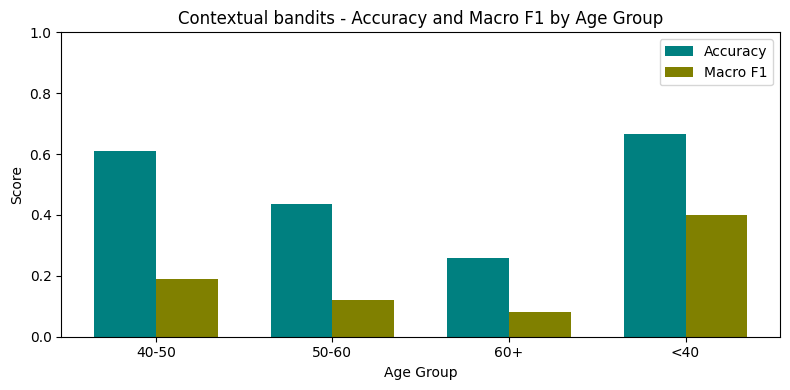

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

NUM_ACTIONS = 5

# Load age analysis file
df_age = pd.read_csv("../../data/age_analysis/Xy_test_age_analysis.csv").rename(columns={"num": "true"})
df_age['pred'] = df["pred"]
age_groups = sorted(df_age['age_group'].unique())
acc_by_age = []
f1_by_age = []
cum_correct_by_age = []
pred_rates_by_age = []

for g in age_groups:
        mask = df_age['age_group'] == g
        y_true = df_age.loc[mask, 'true']
        y_pred = df_age.loc[mask, 'pred']

        acc_by_age.append(accuracy_score(y_true, y_pred)) # type: ignore
        f1_by_age.append(f1_score(y_true, y_pred, average='macro')) # type: ignore
        cum_correct_by_age.append(np.cumsum((y_pred==y_true).astype(int))) # type: ignore
        pred_rates_by_age.append([(y_pred==c).mean() for c in range(NUM_ACTIONS)]) # type: ignore


age_colors = plt.cm.viridis(np.linspace(0.3,0.8,len(age_groups))) # type: ignore


x = np.arange(len(age_groups))
width = 0.35
plt.figure(figsize=(8,4))
plt.bar(x - width/2, acc_by_age, width, label="Accuracy", color='teal')
plt.bar(x + width/2, f1_by_age, width, label="Macro F1", color='olive')

plt.xticks(x, age_groups)
plt.ylim(0,1)
plt.xlabel("Age Group")
plt.ylabel("Score")
plt.title("Contextual bandits - Accuracy and Macro F1 by Age Group")
plt.legend()
plt.tight_layout()
plt.show()

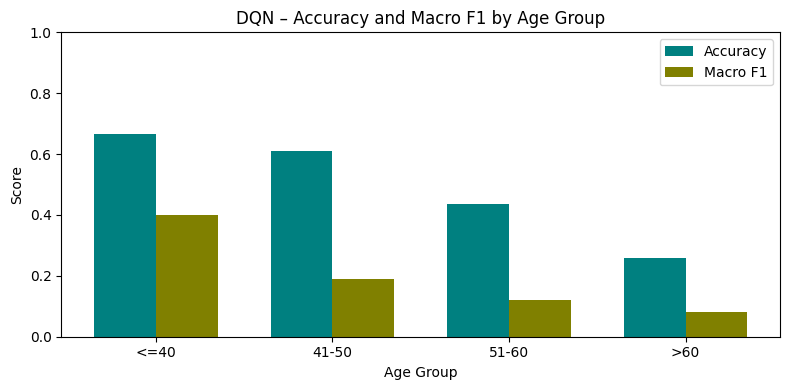

In [21]:
# Desired age order and display names
desired_order = ["<40", "40-50", "50-60", "60+"]
display_names = {
    "<40": "<=40",
    "40-50": "41-50",
    "50-60": "51-60",
    "60+": ">60",
}

# Ensure only existing groups are used (in case some are missing)
age_groups = [g for g in desired_order if g in df_age['age_group'].unique()]

# === rest of your code ===
acc_by_age = []
f1_by_age = []
cum_correct_by_age = []
pred_rates_by_age = []

for g in age_groups:
    mask = df_age['age_group'] == g
    y_true = df_age.loc[mask, 'true']
    y_pred = df_age.loc[mask, 'pred']

    acc_by_age.append(accuracy_score(y_true, y_pred))
    f1_by_age.append(f1_score(y_true, y_pred, average='macro'))
    cum_correct_by_age.append(np.cumsum((y_pred==y_true).astype(int)))
    pred_rates_by_age.append([(y_pred==c).mean() for c in range(NUM_ACTIONS)])

age_colors = plt.cm.viridis(np.linspace(0.3, 0.8, len(age_groups)))

# === Plot ===
x = np.arange(len(age_groups))
width = 0.35
plt.figure(figsize=(8, 4))
plt.bar(x - width/2, acc_by_age, width, label="Accuracy", color='teal')
plt.bar(x + width/2, f1_by_age, width, label="Macro F1", color='olive')

# Apply display names to ticks
plt.xticks(x, [display_names[g] for g in age_groups])
plt.ylim(0, 1)
plt.xlabel("Age Group")
plt.ylabel("Score")
plt.title("DQN – Accuracy and Macro F1 by Age Group")
plt.legend()
plt.tight_layout()
plt.show()